# UTMB Comparing Predictions

This notebook compares the category predictions, gender only predictions and predictions without factoring gender or category. We also compare the predictions for the UTMB using historical CCC pace, with predictions for the UTMB with UTMB paces. Finally we compare the predictions using grade adjusted pace and the original UTMB predictions 

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/pace_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.489501,11.680842,13.330479,13.330815,13.089284
1,1,Senior Men (23-39),Male,15.188612,13.489501,12.564133,14.455599,14.455653,14.593701
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.427646,15.297827,15.298082,15.796754
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.267966,15.590489,15.591208,15.625839
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.010092,14.010088,13.451506


In [4]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [5]:
df = df.dropna()

# Gender Only

In [6]:
df1 = pd.read_csv('../../data/GO_pace_predictions.csv', encoding = "ISO-8859-1")

In [7]:
df1.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.489501,12.994630,13.267151,13.267170,13.084611
1,1,Senior Men (23-39),Male,15.188612,13.489501,14.561941,15.165493,15.165590,14.544371
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.862793,15.946644,15.946630,16.087892
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.592674,16.020199,16.020118,15.783054
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.176924,14.177359,13.047495


In [8]:
df1['pb_error'] = df1.best_pb_prediction - df1.query_pb
df1['pb_error'] = df1.pb_error.abs()
df1['mean_error'] = df1.mean_pb_average_pace - df1.query_pb
df1['mean_error'] = df1.mean_error.abs()
df1['cos_error'] = df1.weighted_mean - df1.query_pb
df1['cos_error'] = df1.cos_error.abs()
df1['euc_error'] = df1.euc_weighted_mean - df1.query_pb
df1['euc_error'] = df1.euc_error.abs()

In [9]:
df1 = df1.dropna()

# Ignoring Gender

In [10]:
df2 = pd.read_csv('../../data/IG_pace_predictions.csv', encoding = "ISO-8859-1")

In [11]:
df2.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.489501,12.994630,13.413751,13.413701,13.084611
1,1,Senior Men (23-39),Male,15.188612,13.489501,14.561941,14.940140,14.940304,14.544371
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.862793,15.946644,15.946630,16.000767
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.948240,15.796866,15.796847,15.796307
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.101669,14.102154,13.098066


In [12]:
df2['pb_error'] = df2.best_pb_prediction - df2.query_pb
df2['pb_error'] = df2.pb_error.abs()
df2['mean_error'] = df2.mean_pb_average_pace - df2.query_pb
df2['mean_error'] = df2.mean_error.abs()
df2['cos_error'] = df2.weighted_mean - df2.query_pb
df2['cos_error'] = df2.cos_error.abs()
df2['euc_error'] = df2.euc_weighted_mean - df2.query_pb
df2['euc_error'] = df2.euc_error.abs()

In [13]:
df2 = df2.dropna()

### Percentage

In [14]:
wabestper = ((df.pb_error / df.query_pb) * 100).mean()
wameanper = ((df.mean_error / df.query_pb) * 100).mean()
wacosper = ((df.cos_error / df.query_pb) * 100).mean()
waeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case Percentage: ', wabestper)
print('Mean of Cases Percentage: ',  wameanper)
print('Cosine Mean %:',  wacosper)
print('Euclidean Mean %: ', waeucper)

Fastest Case Percentage:  9.864390074446712
Mean of Cases Percentage:  6.946618220570911
Cosine Mean %: 6.945719489183475
Euclidean Mean %:  6.725855221333613


In [15]:
abestper = ((df1.pb_error / df1.query_pb) * 100).mean()
ameanper = ((df1.mean_error / df1.query_pb) * 100).mean()
acosper = ((df1.cos_error / df1.query_pb) * 100).mean()
aeucper = ((df1.euc_error / df1.query_pb) * 100).mean()

print('Fastest Case Percentage: ', abestper)
print('Mean of Cases Percentage: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case Percentage:  9.946898908136273
Mean of Cases Percentage:  6.8867587579572085
Cosine Mean %: 6.887257503414209
Euclidean Mean %:  6.661457666127492


In [16]:
ibestper = ((df2.pb_error / df2.query_pb) * 100).mean()
imeanper = ((df2.mean_error / df2.query_pb) * 100).mean()
icosper = ((df2.cos_error / df2.query_pb) * 100).mean()
ieucper = ((df2.euc_error / df2.query_pb) * 100).mean()

print('Fastest Case Percentage: ', ibestper)
print('Mean of Cases Percentage: ',  imeanper)
print('Cosine Mean %:',  icosper)
print('Euclidean Mean %: ', ieucper)

Fastest Case Percentage:  9.940991940127446
Mean of Cases Percentage:  6.890027688531212
Cosine Mean %: 6.890001156124148
Euclidean Mean %:  6.624243652916474


In [17]:
gender_only = [ameanper, abestper, acosper, aeucper]
original = [wameanper, wabestper, wacosper, waeucper]
ignore_all = [imeanper, ibestper, icosper, ieucper]

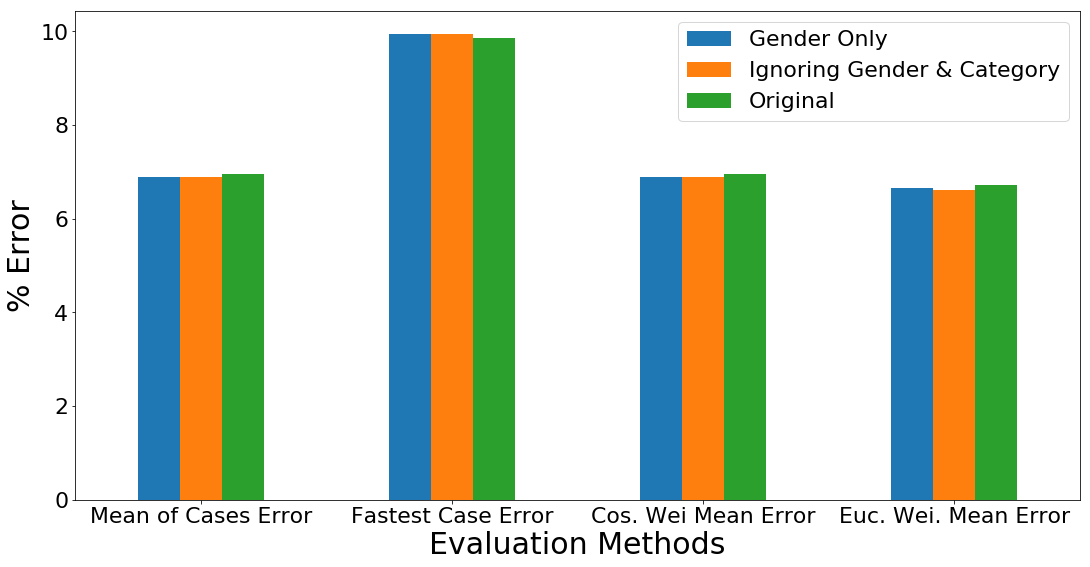

In [18]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Cos. Wei Mean Error', 'Euc. Wei. Mean Error']
gra_w = pd.DataFrame({'Original': original, 'Gender Only': gender_only, 'Ignoring Gender & Category': ignore_all}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=22, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Evaluation Methods', fontsize = 30)
ax.legend(fontsize = 22)

Predictions were found using three different techniques: (1) Finding similar runners with equal
category, (2) Finding similar runners with equal gender only, (3) Finding similar runners ignoring
gender and category.
The comparisons show that for the UTMB it does not make a considerable difference to only
retrieve runners of equal category/gender when using the case base reasoning approach. The
results are almost equal in each evaluation method. This indicates that there is not much difference
between gender or age groups in terms of performance. Nevertheless, for this analysis, only cases
of the same category would be retrieved. According to many studies above, there is a difference
in terms of performance for categories and gender. Although, these results seem to indicate these
differences do not have a great effect on average pace prediction. Equal category is remains the
primary technique in case there are runners who are outperforming other runners despite running
the same pace.


# CCC vs UTMB

This sections compares the predictions for the UTMB using historical CCC pace, with predictions for the UTMB with UTMB paces. 

In [19]:
df3 = pd.read_csv('../../data/CCC_predictions.csv', encoding = "ISO-8859-1")

In [20]:
df3.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Masters Men 1 (40-49),Male,11.246015,15.222938,11.995858,14.050342,14.050399,14.394697
1,1,Senior Men (23-39),Male,21.929566,15.222938,15.726010,16.750925,16.750918,16.442480
2,2,Senior Men (23-39),Male,10.436679,12.416371,11.363543,13.571467,13.571714,13.875511
3,3,Senior Men (23-39),Male,18.033282,13.945114,14.328692,16.382603,16.382770,15.795056
4,4,Senior Men (23-39),Male,17.350464,12.670525,14.945903,16.093129,16.093250,15.758484


In [21]:
df3['pb_error'] = df3.best_pb_prediction - df3.query_pb
df3['pb_error'] = df3.pb_error.abs()
df3['mean_error'] = df3.mean_pb_average_pace - df3.query_pb
df3['mean_error'] = df3.mean_error.abs()
df3['cos_error'] = df3.weighted_mean - df3.query_pb
df3['cos_error'] = df3.cos_error.abs()
df3['euc_error'] = df3.euc_weighted_mean - df3.query_pb
df3['euc_error'] = df3.euc_error.abs()

In [22]:
df3 = df3.dropna()

In [23]:
df3.describe()

,Unnamed: 0,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,1398.500000,14.131484,15.058097,13.372615,14.934657,14.935100,15.068784,2.053001,1.260699,1.260610,1.230525
std,807.857351,2.899558,2.055731,1.981932,1.441679,1.442207,1.451683,1.602567,1.055860,1.056204,1.037619
min,0.000000,6.163279,7.012357,7.369861,8.390882,8.393641,8.399398,0.001173,0.000000,0.000000,0.000000
25%,699.250000,12.098042,13.903040,12.149443,14.305404,14.305308,14.446324,0.791482,0.467203,0.467144,0.455999
50%,1398.500000,14.114119,15.482386,13.561963,15.213592,15.213645,15.406308,1.692978,0.996875,0.996800,0.952259
75%,2097.750000,15.721295,16.518035,14.892698,16.012139,16.013156,16.115056,2.962373,1.781175,1.780925,1.728068
max,2797.000000,25.686363,20.920000,17.907937,17.524743,17.524891,18.363630,9.292356,7.926842,7.930365,8.054675


In [24]:
cbestper = ((df3.pb_error / df3.query_pb) * 100).mean()
cmeanper = ((df3.mean_error / df3.query_pb) * 100).mean()
ccosper = ((df3.cos_error / df3.query_pb) * 100).mean()
ceucper = ((df3.euc_error / df3.query_pb) * 100).mean()

print('Fastest Case Percentage: ', cbestper)
print('Mean of Cases Percentage: ',  cmeanper)
print('Cosine Mean %:',  ccosper)
print('Euclidean Mean %: ', ceucper)

Fastest Case Percentage:  13.421023878222494
Mean of Cases Percentage:  8.756593822786922
Cosine Mean %: 8.756291062729094
Euclidean Mean %:  8.61880930181558


In [25]:
ccc = [cmeanper, cbestper, ccosper, ceucper]

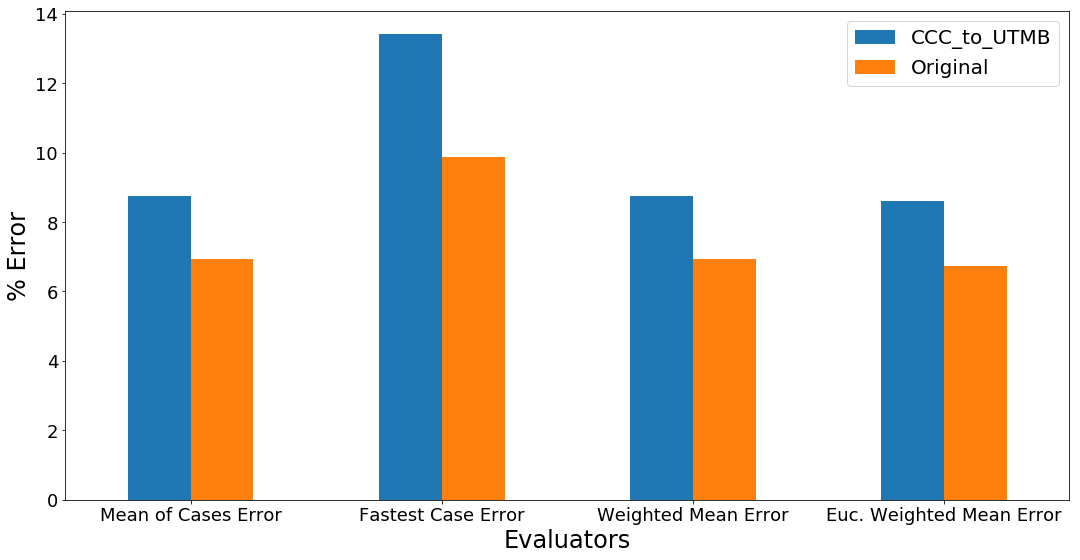

In [26]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Weighted Mean Error', 'Euc. Weighted Mean Error']
gra_w = pd.DataFrame({'Original': original, 'CCC_to_UTMB': ccc}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=18, rot=0)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Evaluators', fontsize = 24)
ax.legend(fontsize = 20)

# Grade Adjusted Pace vs UTMB

Finally we compare the predictions using grade adjusted pace and the original UTMB predictions

In [27]:
df3 = pd.read_csv('../../data/GAP_pace_predictions.csv', encoding = "ISO-8859-1")

In [28]:
df3.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.619279,13.950074,13.036878,13.565867,13.565562,13.506101
1,1,Senior Men (23-39),Male,15.464438,13.950074,12.861522,15.536794,15.536859,15.486665
2,2,Senior Men (23-39),Male,17.017172,13.950512,15.311925,16.276751,16.277098,16.063747
3,3,Masters Men 1 (40-49),Male,18.271550,15.749089,15.196247,16.285705,16.285688,16.505808
4,4,Masters Men 1 (40-49),Male,16.690929,14.369294,13.480787,14.541288,14.541413,15.033237


In [29]:
df3['pb_error'] = df3.best_pb_prediction - df3.query_pb
df3['pb_error'] = df3.pb_error.abs()
df3['mean_error'] = df3.mean_pb_average_pace - df3.query_pb
df3['mean_error'] = df3.mean_error.abs()
df3['cos_error'] = df3.weighted_mean - df3.query_pb
df3['cos_error'] = df3.cos_error.abs()
df3['euc_error'] = df3.euc_weighted_mean - df3.query_pb
df3['euc_error'] = df3.euc_error.abs()

In [30]:
df3 = df3.dropna()

In [31]:
df3.describe()

,Unnamed: 0,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,816.500000,15.137414,13.988890,12.825265,14.198015,14.198013,14.219442,1.583523,1.045361,1.045120,1.033172
std,471.839485,2.443879,2.555218,2.042571,2.197320,2.197427,2.218566,1.414544,1.062956,1.062840,1.054258
min,0.000000,7.421834,7.145710,6.977774,7.682719,7.679069,7.659356,0.002772,0.000071,0.000130,0.001178
25%,408.250000,13.781799,12.257386,11.536424,12.752987,12.753904,12.824507,0.572800,0.346401,0.345807,0.328483
50%,816.500000,15.588838,14.319020,12.930850,14.887991,14.887958,14.924030,1.203702,0.764079,0.763967,0.755355
75%,1224.750000,16.877748,15.737202,14.553671,15.897861,15.898076,15.908617,2.244264,1.414097,1.414003,1.407682
max,1633.000000,21.406122,25.296476,17.307127,18.129856,18.130074,17.961844,14.904793,11.882071,11.882019,11.559565


In [32]:
cbestper = ((df3.pb_error / df3.query_pb) * 100).mean()
cmeanper = ((df3.mean_error / df3.query_pb) * 100).mean()
ccosper = ((df3.cos_error / df3.query_pb) * 100).mean()
ceucper = ((df3.euc_error / df3.query_pb) * 100).mean()

print('Fastest Case Percentage: ', cbestper)
print('Mean of Cases Percentage: ',  cmeanper)
print('Cosine Mean %:',  ccosper)
print('Euclidean Mean %: ', ceucper)

Fastest Case Percentage:  10.773823601828243
Mean of Cases Percentage:  7.685033817667163
Cosine Mean %: 7.6834088614141285
Euclidean Mean %:  7.601834118268265


In [33]:
ccc = [cmeanper, cbestper, ccosper, ceucper]

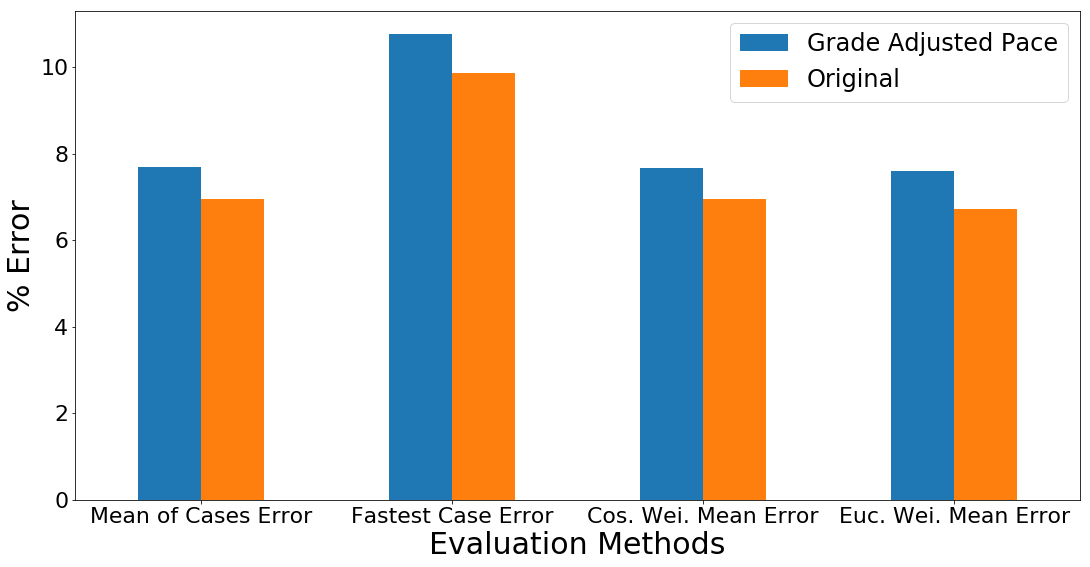

In [34]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Cos. Wei. Mean Error', 'Euc. Wei. Mean Error']
gra_w = pd.DataFrame({'Original': original, 'Grade Adjusted Pace': ccc}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=22, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Evaluation Methods', fontsize = 30)
ax.legend(fontsize = 24)

Grade adjusted pacing has the potential to produce better results. Imagining the race was ran
on a flat surface would give a better indication of average pace and the ability of a runner. The
results do not reflect this theory. It produces a higher error in each evaluation method. Why is
this the case? Grade adjusted pace is just an estimate. The nature of the UTMB stages means
these estimates may not be very good. Some of the stages contain many peaks and falls that
would not be taken into account in the rise/run technique of finding the grade. The nature of
the data gives a pace between two stage points, and the grade is found by getting the altitude
of those stage points and calculating the grade. However, if there is a large peak or fall in the
middle of that stage this is not considered when the gradient is found, and the pace is adjusted.
The data set contains the stage from Chamonix to Le Delevret.
There is no data for Les Houches pace. Therefore, the grade is calculated between the point
of Delevret to Chamonix, without taking into account the marginal drop to Les Houches. This
causes poor grade adjusted pace estimates, and subsequently poorer predictions.
